<a href="https://colab.research.google.com/github/michalMalujdy/machine-learning-colab/blob/master/yolo_darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

## Download and install Darknet

In [22]:
! git clone https://github.com/pjreddie/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [23]:
! mv ./darknet/* ./
! rm -r darknet

mv: cannot stat './darknet/*': Not a directory


In [24]:
! make

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast obj/captcha.o obj/lsd.o obj/super.o obj/art.o obj/tag.o obj/cifar.o obj/go.o obj/rnn.o obj/segmenter.o obj/regressor.o obj/classifier.o obj/coco.o obj/yolo.o obj/detector.o obj/nightmare.o obj/instance-segmenter.o obj/darknet.o libdarknet.a -o darknet -lm -pthread  libdarknet.a


In [25]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2018-11-10 15:33:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  70.4MB/s    in 3.6s    

2018-11-10 15:33:32 (66.1 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



## Download 3 example images, define displaying results

In [26]:
! wget https://i.ytimg.com/vi/KYfkWCrDAI0/maxresdefault.jpg
! mv maxresdefault.jpg example1_img.jpg

! wget https://mediaassets.news5cleveland.com/photo/2018/09/11/West%2035th%20street%20burglar%20suspect_1536691704340.jpg_97141449_ver1.0_640_480.jpg
! mv "West 35th street burglar suspect_1536691704340.jpg_97141449_ver1.0_640_480.jpg" example2_img.jpg

! wget https://www.racv.com.au/content/dam/racv/images/membership/benefits/royalauto/homeandcommunity/Burglars_.jpg
! mv Burglars_.jpg example3_img.jpg

--2018-11-10 15:33:33--  https://i.ytimg.com/vi/KYfkWCrDAI0/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 108.177.112.119, 108.177.111.119, 173.194.74.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|108.177.112.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132073 (129K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>] 128.98K  --.-KB/s    in 0.002s  

2018-11-10 15:33:33 (59.8 MB/s) - ‘maxresdefault.jpg’ saved [132073/132073]

--2018-11-10 15:33:35--  https://mediaassets.news5cleveland.com/photo/2018/09/11/West%2035th%20street%20burglar%20suspect_1536691704340.jpg_97141449_ver1.0_640_480.jpg
Resolving mediaassets.news5cleveland.com (mediaassets.news5cleveland.com)... 151.101.186.133, 2a04:4e42:b::645
Connecting to mediaassets.news5cleveland.com (mediaassets.news5cleveland.com)|151.101.186.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231428 (226K) [image/jpeg]
Saving t

In [0]:
from PIL import Image
import matplotlib.pyplot as plt

def show_output():
  plt.figure().gca().grid(False)
  plt.axis('off')

  plt.imshow(Image.open('predictions.jpg'))
  plt.show()

# Run YOLO for every example, display results

## Example 1

In [28]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights example1_img.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

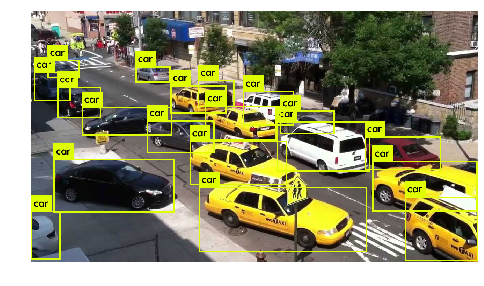

In [29]:
show_output()



---



## Example 2

In [30]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights example2_img.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

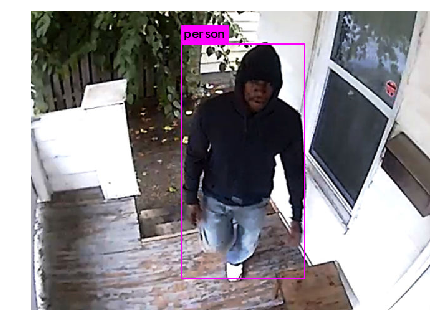

In [31]:
show_output()



---



## Example 3

In [32]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights example3_img.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

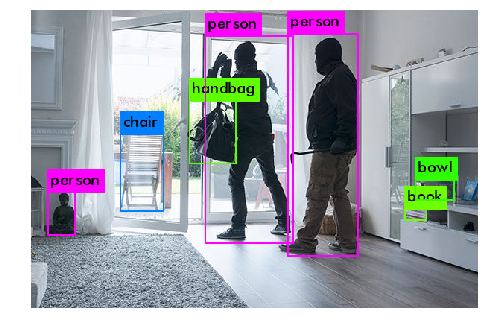

In [33]:
show_output()